In [1]:
pip install git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

  Cloning git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to /tmp/pip-req-build-oheo9h7h
  Running command git clone -q git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git /tmp/pip-req-build-oheo9h7h
     |████████████████████████████████| 5.6 MB 15.8 MB/s 
     |████████████████████████████████| 117 kB 43.7 MB/s 
     |████████████████████████████████| 180 kB 47.2 MB/s 
     |████████████████████████████████| 76 kB 3.0 MB/s 
     |████████████████████████████████| 131 kB 55.5 MB/s 
     |████████████████████████████████| 32.8 MB 175 kB/s 
     |████████████████████████████████| 8.5 MB 39.0 MB/s 
     |████████████████████████████████| 79 kB 5.9 MB/s 
     |████████████████████████████████| 138 kB 43.3 MB/s 
     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 5.1 MB 34.1 MB/s 
     |████████████████████████████████| 127 kB 45.6 MB/s 
  Created wheel for lucem-illud: filename=lucem_illud-8.0.1-py3-

In [2]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
import lucem_illud #just in case, regularly update your lucem_illud with the following code: pip install git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#All these packages need to be installed from pip
import requests #for http requests
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls
import bs4
import regex as re

# comp-linguistics
import spacy

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

## <font color="red">*Exercise 1*</font>

<font color="red">Construct cells immediately below this that input and interrogate a corpus relating to your anticipated final project. This could include one of the Davies corpora or some other you have constructed. Turn your text into an nltk `Text` object, and explore all of the features examined above, and others that relate to better understanding your corpus in relation to your research question. </font>

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
corpus_name = "/content/drive/My Drive/Colab Notebooks/data/NOW"
def loadcorpus(corpus_name, corpus_style="text"):
    texts_raw = {}
    for file in os.listdir(corpus_name + "/"):
        if corpus_style in file:
            print(file)
            zfile = zipfile.ZipFile(corpus_name + "/" + file)
            for file in zfile.namelist():
              if file.endswith('-sg.txt'):
                texts_raw[file] = []
                with zfile.open(file) as f:
                    for line in f:
                        texts_raw[file].append(line)
    return texts_raw

In [11]:
raw_text = loadcorpus(corpus_name)

text_10-01-kus.zip
text_10-02-kvz.zip
text_10-03-ovi.zip
text_10-04-laq.zip
text_10-05-wbb.zip
text_10-06-bwq.zip
text_10-07-uek.zip
text_10-08-lqd.zip
text_10-09-udn.zip
text_10-10-nln.zip
text_10-11-weq.zip
text_10-12-ixv.zip
text_11-01-pct.zip
text_11-02-keb.zip
text_11-03-lup.zip
text_11-04-fpt.zip
text_11-05-gbc.zip
text_11-06-hld.zip
text_11-07-mpk.zip
text_11-08-lag.zip
text_11-09-ptj.zip
text_11-10-qsy.zip
text_11-11-rst.zip
text_11-12-dxg.zip
text_12-01-jgs.zip
text_12-02-eig.zip
text_12-03-hge.zip
text_12-04-qzl.zip
text_12-05-qvg.zip
text_12-06-ury.zip
text_12-07-jbh.zip
text_12-08-apx.zip
text_12-09-qxc.zip
text_12-10-fim.zip
text_12-11-ysq.zip
text_12-12-fbe.zip
text_13-01-lii.zip
text_13-02-fwy.zip
text_13-03-zxv.zip
text_13-04-vzr.zip
text_13-05-skm.zip
text_13-06-rak.zip
text_13-07-mht.zip
text_13-08-ofo.zip
text_13-09-ibd.zip
text_13-10-zpv.zip
text_13-11-vwg.zip
text_13-12-yny.zip
text_14-01-jhx.zip
text_14-02-fbh.zip
text_14-03-mps.zip
text_14-04-oki.zip
text_14-05-c

In [12]:
year_2019 = ['19-01-sg.txt','19-02-sg.txt','19-03-sg.txt','19-04-sg.txt','19-05-sg.txt','19-06-sg.txt','19-07-sg.txt','19-08-sg.txt']

In [15]:
def clean_raw_text(raw_texts):
    clean_texts = []
    for text in raw_texts:
        try:
            text = text.decode("utf-8")
            clean_text = text.replace(" \'m", "'m").replace(" \'ll", "'ll").replace(" \'re", "'re").replace(" \'s", "'s").replace(" \'re", "'re").replace(" n\'t", "n't").replace(" \'ve", "'ve").replace(" /'d", "'d")
            clean_texts.append(clean_text)
        except AttributeError:
            # print("ERROR CLEANING")
            # print(text)
            continue
        except UnicodeDecodeError:
            # print("Unicode Error, Skip")
            continue
    return clean_texts

In [16]:
clean = []
for year in year_2019:
  clean.extend(clean_raw_text(raw_text[year]))

clean[:20]

["@ @ @ @ @ @ @ Researchvector Inc. , has vast information about the Oil and Gas Pipe market and its potential . The report is useful to everyone right from an expert , analyst , manager to an employee as it contains a variety of analytical and statistical data enabling the reader to have a complete overview and an in and out knowledge , which can be applied in the decision-making process concerning the core and crucial business areas . <p> In order to comprehend the knowledge and insights received from this report , some illustration and presentation are also included alongside the data . These are in the form of charts , graphs , tables etc . Rather than reading the raw data , reading through tools is easier and more inferences can be drawn looking at these illustrative diagrams . <p> This report also helps the readers to get their hands on ready-to-access analytical data provided by the industry professionals . They can understand various vital trends , drivers , and challenges in t

In [17]:
nlp = spacy.load("en_core_web_sm")

In [18]:
def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized

In [20]:
sgtokens = []
# print(int(len(clean)//1.2), len(clean))
# c = 0
# for texts in clean[int(len(clean)//1.002):]: 
#   for words in texts:
#     c += 1
# c
count = 0 
for texts in clean[::10]:
  count += 1
  print(count)
  sgtokens.extend(word_tokenize(texts)) 
  if count == 10000:
    break

sgtokens[:10]

Streaming output truncated to the last 5000 lines.
5001
5002
5003
5004
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190

['Researchvector',
 'Inc.',
 'has',
 'vast',
 'information',
 'about',
 'the',
 'Oil',
 'and',
 'Gas']

In [21]:
import nltk

In [22]:
sgText = nltk.Text(sgtokens)

sgIndex = nltk.text.ConcordanceIndex(sgText)


In [ ]:
sgIndex.print_concordance('helper')

Displaying 11 of 11 matches:
side with his father and domestic helper < p > Following Wang 's offer the
ide with the child and a domestic helper in a condominium according to cou
the care of his Filipino domestic helper while in Cold War Pawlikowski 's 
device to use its voice activated helper Google Assistant which is powered
she easily finds a job becoming a helper known at the time of the photogra
es Two persons the driver and his helper have been arrested he said < p > 
 have arrested the driver and the helper of the goods vehicle We are inter
s Chua says as she motions to her helper to remove some of the offending p
chandani argued that the domestic helper was not responsible for some of t
ued Hong Kong 's foreign domestic helper population of 370,000 are often t
elino who moved to Hong Kong as a helper 23 years ago to support her twin 


In [ ]:
sgText.common_contexts(['migrant', 'worker'])

a_who


In [ ]:
topics = ['migrant','domestic', 'worker', 'labour' ,'transient', 'maid', 'helper']
for topic in topics: 
  print(topic, sgText.count(topic))

migrant 51
domestic 443
worker 183
labour 309
transient 5
maid 20
helper 11


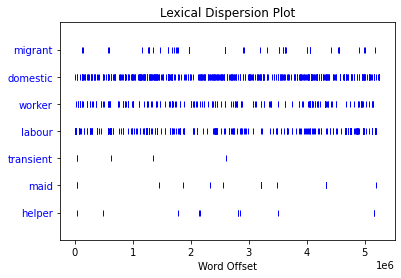

In [ ]:
sns.reset_orig() #Seaborn messes with this plot, disabling it
sgText.dispersion_plot(['migrant','domestic', 'worker', 'labour' ,'transient','maid', 'helper'])
sns.set() #Re-enabling seaborn

In [23]:
def concordance(ci, word, width=75, lines=25):
    """
    Rewrite of nltk.text.ConcordanceIndex.print_concordance that returns results
    instead of printing them. 

    See:
    http://www.nltk.org/api/nltk.html#nltk.text.ConcordanceIndex.print_concordance
    """
    half_width = (width - len(word) - 2) // 2
    context = width // 4 # approx number of words of context

    results = []
    offsets = ci.offsets(word)
    if offsets:
        lines = min(lines, len(offsets))
        for i in offsets:
            if lines <= 0:
                break
            left = (' ' * half_width +
                    ' '.join(ci._tokens[i-context:i]))
            right = ' '.join(ci._tokens[i+1:i+context])
            left = left[-half_width:]
            right = right[:half_width]
            results.append('%s %s %s' % (left, ci._tokens[i], right))
            lines -= 1

    return results

In [24]:
topics = ['domestic', 'migrant', 'helper', 'labour' ,'transient', 'maid', 'maids']
topicsdic = {}
for topic in topics:
  result = concordance(sgIndex, topic)
  if topic not in topicsdic: 
    topicsdic[topic] = ""
  for word in result:
    topicsdic[topic] += (word)
  
topicsdic

{'domestic': "nd itself with a declining gross domestic product GDP rising incidence of ting outside with his father and domestic helper < p > Following Wang 's odia after he had resumed playing domestic cricket following the completiontime in 19 months in December as domestic and export orders continued to wxpressing support for Huawei and domestic peer ZTE Corp He later said his nd funding for measures to fight domestic violence < p > Advertisement < pAT < p > The party 's demand for domestic violence legislation to be overto said one should not politicise domestic violence < p > On direction he ahat state aid to male victims of domestic violence be increased < p > It sxpressing support for Huawei and domestic peer ZTE Corp He later said his not to mention assistance in the domestic manufacture of aircraft radar anetary policies aimed at boosting domestic demand in his attempt to minimis the European Union 's declining domestic reputations But perhaps also to  online and offline over

In [25]:
sgnewsdf = pandas.DataFrame(topicsdic.items(), columns= ['Topic', 'Contexts'])
sgnewsdf.to_csv('CCA_week2_sg_2')
sgnewsdf

,Topic,Contexts
0,domestic,nd itself with a declining gross domestic prod...
1,migrant,nia 's separatist push and rising migrant arri...
2,helper,side with his father and domestic helper < p >...
3,labour,and researchers who study bonded labour say t...
4,transient,< p > So here 's to Popspoken 's transient rea...
5,maid,< p > Following Wang 's offer the maid asked ...
6,maids,s @@40504475 < h > Report suggests maids at ri...


## <font color="red">*Exercise 2*</font>

<font color="red">Construct cells immediately below this that filter, stem and lemmatize the tokens in your corpus, and then creates plots (with titles and labels) that map the word frequency distribution, word probability distribution, and at least two conditional probability distributions that help us better understand the social and cultural game underlying the production of your corpus. Create a wordl of words (or normalized words) and add a few vague comments about what mysteries are revealed through it.</font>


In [26]:
sgnewsdf['tokenized_text'] = sgnewsdf['Contexts'].apply(lambda x: word_tokenize(x))

In [ ]:
countsDict = {}
for word in sgnewsdf['tokenized_text'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts[:20]

[('the', 82),
 ('of', 54),
 ('to', 52),
 ('<', 47),
 ('and', 44),
 ('>', 43),
 ('in', 40),
 ('p', 39),
 ('domestic', 33),
 ('a', 32),
 ('labour', 29),
 ('migrant', 25),
 ('maid', 22),
 ('maids', 22),
 ('that', 18),
 ('for', 17),
 ("'s", 16),
 ('as', 16),
 ('is', 16),
 ('her', 13)]

In [ ]:
stop_words_freq = []
topics = ['migrant','domestic', 'worker', 'labour' ,'transient', 'maid', 'maids', 'helper']
for topic in topics:
  for word, count in word_counts:
      if word == topic:
          break
      else:
          stop_words_freq.append(word)

stop_words_freq 

['the',
 'of',
 'to',
 '<',
 'and',
 '>',
 'in',
 'p',
 'domestic',
 'a',
 'labour',
 'the',
 'of',
 'to',
 '<',
 'and',
 '>',
 'in',
 'p',
 'the',
 'of',
 'to',
 '<',
 'and',
 '>',
 'in',
 'p',
 'domestic',
 'a',
 'labour',
 'migrant',
 'maid',
 'maids',
 'that',
 'for',
 "'s",
 'as',
 'is',
 'her',
 'with',
 'his',
 'helper',
 'The',
 'not',
 'was',
 'at',
 'who',
 'he',
 'said',
 'be',
 'are',
 'A',
 'have',
 'which',
 'an',
 'workers',
 'h',
 'will',
 'violence',
 'or',
 'I',
 'care',
 'movement',
 'transient',
 'one',
 'should',
 'but',
 'has',
 '$',
 'going',
 'rights',
 'on',
 'while',
 'time',
 'mother',
 'gross',
 'product',
 'Following',
 'Wang',
 'after',
 'months',
 'support',
 'He',
 'On',
 'aims',
 'help',
 'its',
 'over',
 'so',
 'back',
 'their',
 'forced',
 'working',
 'Mexico',
 'she',
 'this',
 'force',
 'must',
 'costs',
 'financial',
 'Singaporean',
 'taking',
 'from',
 'risk',
 'women',
 'nd',
 'itself',
 'declining',
 'rising',
 'father',
 'Huawei',
 'peer',
 'ZT

In [27]:
stop_words = ['the', 'of', 'who', 'with', 'to', 'p', '<', '>', 'in', 'and', 'a']

In [28]:
def normalizeTokens(word_list, extra_stop=[]):
    #We can use a generator here as we just need to iterate over it
    normalized = []
    if type(word_list) == list and len(word_list) == 1:
        word_list = word_list[0]

    if type(word_list) == list:
        word_list = ' '.join([str(elem) for elem in word_list]) 

    doc = nlp(word_list.lower())
    
    # add the property of stop word to words considered as stop words
    if len(extra_stop) > 0:
        for stopword in extra_stop:
            lexeme = nlp.vocab[stopword]
            lexeme.is_stop = True

    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article
        if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and len(w.text.strip()) > 0:
            # we add the lematized version of the word
            normalized.append(str(w.lemma_))

    return normalized

In [29]:
sgnewsdf['normalized'] = sgnewsdf['tokenized_text'].apply(lambda x: normalizeTokens(x, stop_words))
sgnewsdf['normalized_counts'] = sgnewsdf['normalized'].apply(lambda x: len(x))

sgnewsdf.head()

,Topic,Contexts,tokenized_text,normalized,normalized_counts
0,domestic,nd itself with a declining gross domestic prod...,"[nd, itself, with, a, declining, gross, domest...","[nd, decline, gross, domestic, product, gdp, r...",177
1,migrant,nia 's separatist push and rising migrant arri...,"[nia, 's, separatist, push, and, rising, migra...","[nia, separatist, push, rise, migrant, arrival...",176
2,helper,side with his father and domestic helper < p >...,"[side, with, his, father, and, domestic, helpe...","[father, domestic, helper, follow, wang, offer...",73
3,labour,and researchers who study bonded labour say t...,"[and, researchers, who, study, bonded, labour,...","[researcher, study, bond, labour, wo, rescube,...",159
4,transient,< p > So here 's to Popspoken 's transient rea...,"[<, p, >, So, here, 's, to, Popspoken, 's, tra...","[popspoken, transient, reader, one, enter, one...",31


905


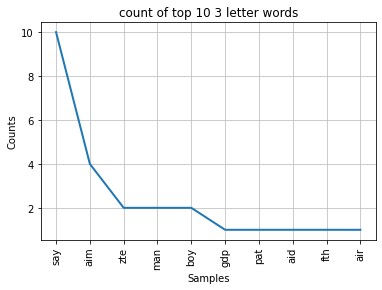

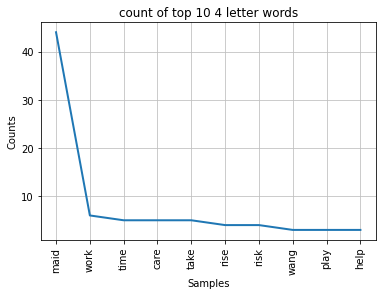

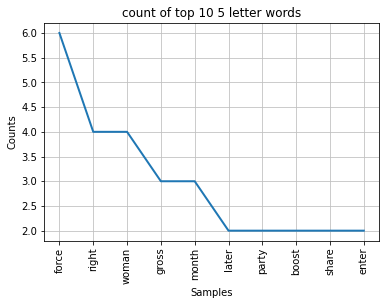

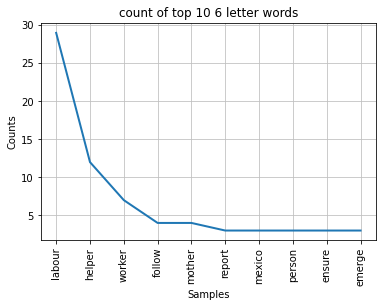

In [31]:
sgnewsdist = nltk.ConditionalFreqDist(((len(w), w) for w in sgnewsdf['normalized'].sum()))

print(sgnewsdist.N())
for i in range(3, 7):
  sgnewsdist[i].plot(10, title = "count of top 10 {} letter words".format(i))

In [32]:
sgnewsprobdist = nltk.ConditionalProbDist(sgnewsdist, nltk.ELEProbDist)

for i in range(2, 10):
  print(sgnewsprobdist[i].max())

  print(sgnewsprobdist[i].prob(sgnewsprobdist[i].max()))
  

go
0.225
say
0.1206896551724138
maid
0.19389978213507625
force
0.05058365758754864
labour
0.1340909090909091
migrant
0.16346153846153846
domestic
0.25
transient
0.06395348837209303


In [ ]:
def spacy_pos(word_list):
    tags = []
    doc = nlp(word_list.lower())
    for w in doc:
        tags.append((w.text, w.tag_))
    return tags

In [ ]:
cleaned = []
for text in sgnewsdf['normalized']:
  for word in text:
    if word not in stop_words: 
      cleaned.append(word)


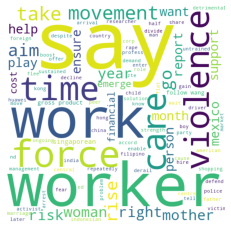

In [ ]:
wc = wordcloud.WordCloud(background_color="white", max_words=100, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(sgnewsdf['normalized'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("migrantworkermentions.pdf", format = 'pdf')

the wordcloud suggests that in the contexts of those in the keywords, words related to labour, force, and caretaking are at the forefront of reporting about transient workers, specifically migrant and domestic wworkers. 

## <font color="red">Exercise 3</font>

<font color="red">In the cells immediately following, perform POS tagging on a meaningful (but modest) subset of a corpus associated with your final project. Examine the list of words associated with at least three different parts of speech. Consider conditional associations (e.g., adjectives associated with nouns or adverbs with verbs of interest). What do these distributions suggest about your corpus?

In [ ]:
normalized_tokens_POS = pandas.Series([spacy_pos(t) for t in cleaned])

In [ ]:
sgnewsdf_WordtoPOS = nltk.ConditionalFreqDist(normalized_tokens_POS.sum())
list(sgnewsdf_WordtoPOS.items())[:10]

[('nd', FreqDist({'NNP': 2})),
 ('decline', FreqDist({'NN': 2})),
 ('gross', FreqDist({'JJ': 3})),
 ('product', FreqDist({'NN': 3})),
 ('gdp', FreqDist({'NNP': 1})),
 ('rise', FreqDist({'VB': 4})),
 ('incidence', FreqDist({'NN': 1})),
 ('te', FreqDist({'NNP': 1})),
 ('outside', FreqDist({'RB': 1})),
 ('father', FreqDist({'NNP': 2}))]

In [ ]:
list(sgnewsdf_WordtoPOS.items())[10:]

[('follow', FreqDist({'VB': 4})),
 ('wang', FreqDist({'NNP': 3})),
 ('odia', FreqDist({'NNP': 1})),
 ('resume', FreqDist({'NN': 1})),
 ('play', FreqDist({'VB': 3})),
 ('cricket', FreqDist({'NN': 1})),
 ('completiontime', FreqDist({'NNP': 1})),
 ('month', FreqDist({'NN': 3})),
 ('december', FreqDist({'NNP': 1})),
 ('export', FreqDist({'NN': 1})),
 ('order', FreqDist({'NN': 1})),
 ('continue', FreqDist({'VB': 1})),
 ('wxpresse', FreqDist({'NNP': 1})),
 ('support', FreqDist({'NN': 3})),
 ('huawei', FreqDist({'NNP': 2})),
 ('peer', FreqDist({'NN': 2})),
 ('zte', FreqDist({'NNP': 2})),
 ('corp', FreqDist({'NNP': 2})),
 ('later', FreqDist({'RB': 2})),
 ('say', FreqDist({'VB': 10})),
 ('funding', FreqDist({'NN': 1})),
 ('measure', FreqDist({'NN': 1})),
 ('fight', FreqDist({'VB': 1})),
 ('violence', FreqDist({'NN': 5})),
 ('advertisement', FreqDist({'NN': 1})),
 ('pat', FreqDist({'NNP': 1})),
 ('party', FreqDist({'NNP': 2})),
 ('demand', FreqDist({'NN': 2})),
 ('legislation', FreqDist({'NN': 1

In [ ]:
sgnewsdf_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in normalized_tokens_POS.sum())

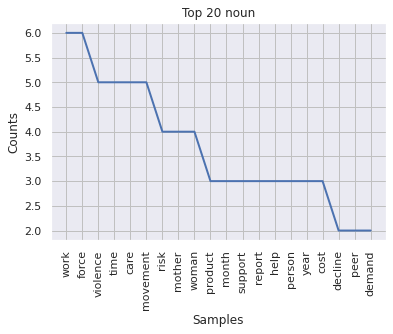

In [ ]:
sgnewsdf_POStoWord['NN'].plot(20, title = "Top 20 noun") 

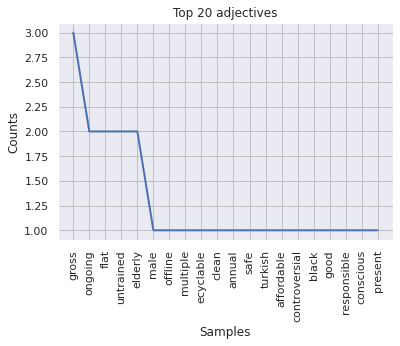

In [ ]:
sgnewsdf_POStoWord['JJ'].plot(20, title = "Top 20 adjectives") 

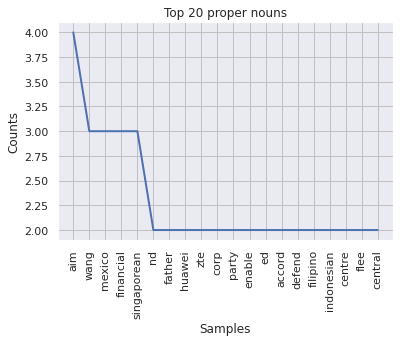

In [ ]:
sgnewsdf_POStoWord['NNP'].plot(20, title = "Top 20 proper nouns") 

These counts represent a reduced corpus that reflects the text found most in concordance with my keywords that are associated with migrant workers. Based on the POS counts, it is firstly interesting that these workers are mentioned often with nouns most associated with violence "violence", "force". I expect there to be more mentions of family if I widened the analysis to the whole corpus

## <font color="red">*Exercise 4*</font>

<font color="red">Construct cells immediately below this that identify statistically significant bigrams, trigrams, quadgrams, higher-order *n*grams and skipgrams. Explore whether these collocations are idiomatic and so irreducible to the semantic sum of their component words. You can do this by examination of conditional frequencies (e.g., what else is 'united' besides the 'United States'). If these phrases are idiomatic, what do they suggest about the culture of the world producing them?

<font color="red">**Stretch**: In Manning and Schütze's textbook, there Section 5.3.2 explores how to use the *t*-test to find words whose co-occurance patterns best distinguish two words. Implement that and use it to explore phrases in your corpus. For instance, you could tell what words come after "America" much more often than after "Iraq"?</font> 

In [95]:
sgBigrams = nltk.collocations.BigramCollocationFinder.from_words(sgnewsdf['normalized'].sum())
print("There are {} bigrams in the finder".format(sgBigrams.N))

There are 905 bigrams in the finder


In [119]:
# conditional frequency 

target = 'domestic'
act = 0
dic = {}
sent = ' '.join(sgnewsdf['normalized'][0])
for bi in list(nltk.bigrams(sent.split())): 
  if target in bi: 
    if bi not in dic: 
      dic[bi] = count
    dic[bi] += 1

dic 



{('$', 'domestic'): 1,
 ('allege', 'domestic'): 1,
 ('assistance', 'domestic'): 1,
 ('boost', 'domestic'): 1,
 ('border', 'domestic'): 1,
 ('clean', 'domestic'): 1,
 ('december', 'domestic'): 1,
 ('decline', 'domestic'): 1,
 ('demand', 'domestic'): 1,
 ('domestic', 'abuse'): 1,
 ('domestic', 'affair'): 1,
 ('domestic', 'cricket'): 1,
 ('domestic', 'customer'): 1,
 ('domestic', 'cyberspace'): 1,
 ('domestic', 'demand'): 1,
 ('domestic', 'export'): 1,
 ('domestic', 'helper'): 1,
 ('domestic', 'manufacture'): 1,
 ('domestic', 'megadeal'): 1,
 ('domestic', 'peer'): 2,
 ('domestic', 'product'): 3,
 ('domestic', 'reputation'): 1,
 ('domestic', 'shopping'): 2,
 ('domestic', 'total'): 1,
 ('domestic', 'unit'): 1,
 ('domestic', 'violence'): 5,
 ('domestic', 'waste'): 1,
 ('enable', 'domestic'): 2,
 ('father', 'domestic'): 1,
 ('fight', 'domestic'): 1,
 ('france', 'domestic'): 1,
 ('gross', 'domestic'): 3,
 ('huawei', 'domestic'): 2,
 ('intervene', 'domestic'): 1,
 ('invest', 'domestic'): 1,
 ('

In [ ]:
def bigramScoring(count, wordsTuple, total):
    return count

print(sgBigrams.nbest(bigramScoring, 10))

[('follow', 'wang'), ('gross', 'product'), ('aim', 'enable'), ('american', 'wait'), ('central', 'american'), ('china', 'india'), ('corp', 'later'), ('cost', 'china'), ('despite', 'ongoing'), ('divide', 'movement')]


In [ ]:
birgramScores = []

def bigramPrinting(count, wordsTuple, total):
    global birgramScores
    birgramScores.append("The first word is:  {}, The second word is: {}".format(*wordsTuple))
    #Returns None so all the tuples are considered to have the same rank

sgBigrams.nbest(bigramPrinting, 10)
print('\n'.join(birgramScores[:10]))

The first word is:  2, The second word is: 2
The first word is:  2, The second word is: 3
The first word is:  3, The second word is: 3
The first word is:  3, The second word is: 1
The first word is:  1, The second word is: 4
The first word is:  4, The second word is: 1
The first word is:  1, The second word is: 1
The first word is:  1, The second word is: 1
The first word is:  1, The second word is: 2
The first word is:  2, The second word is: 4


In [ ]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
sgBigrams.score_ngrams(bigram_measures.likelihood_ratio)[:40]

[(('gross', 'product'), 39.17260101629106),
 (('follow', 'wang'), 34.673919859340586),
 (('american', 'wait'), 27.739575616030518),
 (('central', 'american'), 27.739575616030518),
 (('china', 'india'), 27.739575616030518),
 (('corp', 'later'), 27.739575616030518),
 (('despite', 'ongoing'), 27.739575616030518),
 (('hong', 'kong'), 27.739575616030518),
 (('huawei', 'peer'), 27.739575616030518),
 (('market', 'despite'), 27.739575616030518),
 (('peer', 'zte'), 27.739575616030518),
 (('strength', 'market'), 27.739575616030518),
 (('sustained', 'strength'), 27.739575616030518),
 (('zte', 'corp'), 27.739575616030518),
 (('cost', 'china'), 23.920490606261644),
 (('ongoing', 'financial'), 23.920490606261644),
 (('report', 'suggest'), 23.920490606261644),
 (('singaporean', 'profess'), 23.920490606261644),
 (('support', 'huawei'), 23.920490606261644),
 (('wait', 'mexico'), 23.920490606261644),
 (('wang', 'offer'), 23.920490606261644),
 (('aim', 'enable'), 22.19439817155062),
 (('father', 'follow'

In [ ]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
sgTrigrams = nltk.collocations.TrigramCollocationFinder.from_words(sgnewsdf['normalized'].sum())
sgTrigrams.score_ngrams(trigram_measures.student_t)[:20]

[(('central', 'american', 'wait'), 1.4142036908712696),
 (('huawei', 'peer', 'zte'), 1.4142036908712696),
 (('market', 'despite', 'ongoing'), 1.4142036908712696),
 (('peer', 'zte', 'corp'), 1.4142036908712696),
 (('strength', 'market', 'despite'), 1.4142036908712696),
 (('sustained', 'strength', 'market'), 1.4142036908712696),
 (('zte', 'corp', 'later'), 1.4142036908712696),
 (('american', 'wait', 'mexico'), 1.414198755120357),
 (('cost', 'china', 'india'), 1.414198755120357),
 (('despite', 'ongoing', 'financial'), 1.414198755120357),
 (('support', 'huawei', 'peer'), 1.414198755120357),
 (('shopping', 'aim', 'enable'), 1.4141938193694443),
 (('father', 'follow', 'wang'), 1.414183947867619),
 (('follow', 'wang', 'offer'), 1.414183947867619),
 (('report', 'suggest', 'risk'), 1.414183947867619),
 (('rise', 'cost', 'china'), 1.414183947867619),
 (('emerge', 'rise', 'cost'), 1.414169140614881),
 (('corp', 'later', 'say'), 1.4141642048639684),
 (('suggest', 'risk', 'force'), 1.41415433336214

In [111]:

from nltk.metrics.association import QuadgramAssocMeasures
from nltk.metrics.association import NgramAssocMeasures
# from nltk.metrics.association import SkipgramAssocMeasures

ImportError: ignored

In [109]:
quadgram_measures = QuadgramAssocMeasures()
sgQuadgrams = nltk.collocations.QuadgramCollocationFinder.from_words(sgnewsdf['normalized'].sum())
sgQuadgrams.score_ngrams(quadgram_measures.student_t)[:20]

[(('peer', 'zte', 'corp', 'later'), 1.4142135471094153),
 (('market', 'despite', 'ongoing', 'financial'), 1.4142135394775752),
 (('zte', 'corp', 'later', 'say'), 1.414213486054696),
 (('central', 'american', 'migrant', 'wait'), 1.4142133715770973),
 (('labour', 'market', 'despite', 'ongoing'), 1.4142133410497377),
 (('strength', 'labour', 'market', 'despite'), 1.4142133410497377),
 (('sustained', 'strength', 'labour', 'market'), 1.4142133410497377),
 (('domestic', 'peer', 'zte', 'corp'), 1.414213310522378),
 (('huawei', 'domestic', 'peer', 'zte'), 1.414213310522378),
 (('american', 'migrant', 'wait', 'mexico'), 1.4142132761790984),
 (('labour', 'cost', 'china', 'india'), 1.414213230388059),
 (('support', 'huawei', 'domestic', 'peer'), 1.4142131845970196),
 (('domestic', 'shopping', 'aim', 'enable'), 1.4142130586716612),
 (('shopping', 'aim', 'enable', 'domestic'), 1.4142130586716612),
 (('rise', 'labour', 'cost', 'china'), 1.414212898403023),
 (('emerge', 'rise', 'labour', 'cost'), 1.4

In [112]:
ngram_measures = NgramAssocMeasures()
sgNgrams = nltk.collocations.NgramCollocationFinder.from_words(sgnewsdf['normalized'].sum())
sgNgrams.score_ngrams(ngram_measures.student_t)[:20]

TypeError: ignored

In [ ]:
Ngrams = nltk.ngrams(sgnewsdf['normalized'].sum(), 4)
Counts = {}
for ngram in list(Ngrams):
    if ngram in Counts.keys():
        Counts[ngram] += 1
    else:
        Counts[ngram] = 1
Filtered = {}
for key in Counts.keys():
    if Counts[key] < 2:
        pass
    else:
        Filtered[key] = Counts[key]
print(Filtered)

{('support', 'huawei', 'peer', 'zte'): 2, ('huawei', 'peer', 'zte', 'corp'): 2, ('peer', 'zte', 'corp', 'later'): 2, ('zte', 'corp', 'later', 'say'): 2, ('central', 'american', 'wait', 'mexico'): 2, ('emerge', 'rise', 'cost', 'china'): 2, ('rise', 'cost', 'china', 'india'): 2, ('sustained', 'strength', 'market', 'despite'): 2, ('strength', 'market', 'despite', 'ongoing'): 2, ('market', 'despite', 'ongoing', 'financial'): 2, ('report', 'suggest', 'risk', 'force'): 2}


In [68]:
for sent in sgnewsdf['normalized']:
  skipgram = list(nltk.skipgrams(sent, 2, 2))

skipgram

[('s', '@@40504475'),
 ('s', 'h'),
 ('s', 'report'),
 ('@@40504475', 'h'),
 ('@@40504475', 'report'),
 ('@@40504475', 'suggest'),
 ('h', 'report'),
 ('h', 'suggest'),
 ('h', 'maid'),
 ('report', 'suggest'),
 ('report', 'maid'),
 ('report', 'risk'),
 ('suggest', 'maid'),
 ('suggest', 'risk'),
 ('suggest', 'force'),
 ('maid', 'risk'),
 ('maid', 'force'),
 ('maid', 'labour'),
 ('risk', 'force'),
 ('risk', 'labour'),
 ('risk', 'ms'),
 ('force', 'labour'),
 ('force', 'ms'),
 ('force', 'headline'),
 ('labour', 'ms'),
 ('labour', 'headline'),
 ('labour', 'report'),
 ('ms', 'headline'),
 ('ms', 'report'),
 ('ms', 'suggest'),
 ('headline', 'report'),
 ('headline', 'suggest'),
 ('headline', 'maid'),
 ('report', 'suggest'),
 ('report', 'maid'),
 ('report', 'risk'),
 ('suggest', 'maid'),
 ('suggest', 'risk'),
 ('suggest', 'force'),
 ('maid', 'risk'),
 ('maid', 'force'),
 ('maid', 'labour'),
 ('risk', 'force'),
 ('risk', 'labour'),
 ('risk', 'print'),
 ('force', 'labour'),
 ('force', 'print'),
 ('f

In [ ]:
import gensim

In [ ]:
bigram = gensim.models.Phrases(sgnewsdf['normalized'])

In [ ]:
texts = [bigram[line] for line in sgnewsdf['normalized']]
texts[0]

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['nd',
 'decline',
 'gross',
 'product',
 'gdp',
 'rise',
 'incidence',
 'te',
 'outside',
 'father',
 'follow',
 'wang',
 'odia',
 'resume',
 'play',
 'cricket',
 'follow',
 'completiontime',
 'month',
 'december',
 'export',
 'order',
 'continue',
 'wxpresse',
 'support',
 'huawei',
 'peer',
 'zte',
 'corp',
 'later',
 'say',
 'nd',
 'funding',
 'measure',
 'fight',
 'violence',
 'advertisement',
 'pat',
 'party',
 'demand',
 'violence',
 'legislation',
 'overto',
 'say',
 'politicise',
 'violence',
 'direction',
 'ahat',
 'state',
 'aid',
 'male',
 'victim',
 'violence',
 'increase',
 'sxpresse',
 'support',
 'huawei',
 'peer',
 'zte',
 'corp',
 'later',
 'say',
 'mention',
 'assistance',
 'manufacture',
 'aircraft',
 'radar',
 'anetary',
 'policy',
 'aim',
 'boost',
 'demand',
 'attempt',
 'minimis',
 'european',
 'union',
 'decline',
 'reputation',
 'online',
 'offline',
 'overseas',
 'shopping',
 'aim',
 'enable',
 'shopping',
 'aim',
 'enable',
 'customer',
 'multiple',
 'jewelr

## <font color="red">*Exercise 5*</font>

<font color="red">In the cells immediately following, perform NER on a (modest) subset of your corpus of interest. List all of the different kinds of entities tagged? What does their distribution suggest about the focus of your corpus? For a subset of your corpus, tally at least one type of named entity and calculate the Precision, Recall and F-score for the NER classification just performed.

In [33]:
def sent_tokenize(word_list):
    doc = nlp(str(word_list))
    sentences = [sent.text.strip() for sent in doc.sents]
    return sentences

In [34]:
def tag_sents_ner(sentences):
    """
    function which replicates NLTK ner tagging on sentences.
    """
    new_sents = []
    for sentence in sentences:
        new_sent = ' '.join(sentence)
        new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)
    
    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for ent in sent.ents:
            pos_sent.append((ent.text, ent.label_))
        pos_sents.append(pos_sent)
    
    return pos_sents

In [35]:
sgnewsdf['sentences'] = sgnewsdf['Contexts'].apply(lambda x: [word_tokenize(s) for s in sent_tokenize(x)])

In [36]:

sgnewsdf['classified_text'] = sgnewsdf['sentences'].apply(lambda x: tag_sents_ner(x))

In [65]:
print(sgnewsdf['sentences'].apply(lambda x: tag_sents_ner(x)))

0    [[(nd, ORG)], [], [], [], [(Wang, ORG), (19 mo...
1    [[(nia, ORG)], [], [], [], [(Italy, GPE)], [(E...
2    [[], [], [], [(Wang, ORG), (Filipino, LANGUAGE...
3    [[], [], [(the year 2019, DATE)], [(2018, DATE...
4    [[], [(Popspoken, PERSON)], [], [], [], [], [(...
5    [[], [(Wang, ORG)], [], [], [], [], [], [(Mari...
6    [[(@@40504475, ORG)], [], [], [(15 years, DATE...
Name: sentences, dtype: object


In [64]:
po = []
for key, value in zip(sgnewsdf['sentences'][:1], sgnewsdf['classified_text'][:1]):
  for i in key: 
    for word in i: 
      sent = ' '.join(word)
      po.append((sent, {'entities': value}))
  
po

[('n d',
  {'entities': [[('nd', 'ORG')],
    [],
    [],
    [],
    [('Wang', 'ORG'),
     ('19 months', 'DATE'),
     ('December', 'DATE'),
     ('Huawei', 'ORG')],
    [('ZTE Corp He later', 'ORG'), ('nd', 'ORG')],
    [],
    [],
    [('one', 'CARDINAL')],
    [],
    [],
    [],
    [],
    [('Huawei', 'ORG')],
    [('ZTE Corp He later', 'ORG'), ("the European Union 's", 'ORG')],
    [('Japanese', 'NORP'),
     ('Indonesia', 'GPE'),
     ('17.8 percent', 'PERCENT'),
     ('JAhe', 'ORG')],
    [('Loroffice', 'ORG'), ('only $ 618', 'MONEY'), ('1,349', 'MONEY')],
    [('@@40479', 'ORG')],
    [('Air France', 'ORG')],
    []]}),
 ('i t s e l f',
  {'entities': [[('nd', 'ORG')],
    [],
    [],
    [],
    [('Wang', 'ORG'),
     ('19 months', 'DATE'),
     ('December', 'DATE'),
     ('Huawei', 'ORG')],
    [('ZTE Corp He later', 'ORG'), ('nd', 'ORG')],
    [],
    [],
    [('one', 'CARDINAL')],
    [],
    [],
    [],
    [],
    [('Huawei', 'ORG')],
    [('ZTE Corp He later', 'ORG'),

In [37]:
sgnewsdf['classified_text']

0    [[(nd, ORG)], [], [], [], [(Wang, ORG), (19 mo...
1    [[(nia, ORG)], [], [], [], [(Italy, GPE)], [(E...
2    [[], [], [], [(Wang, ORG), (Filipino, LANGUAGE...
3    [[], [], [(the year 2019, DATE)], [(2018, DATE...
4    [[], [(Popspoken, PERSON)], [], [], [], [], [(...
5    [[], [(Wang, ORG)], [], [], [], [], [], [(Mari...
6    [[(@@40504475, ORG)], [], [], [(15 years, DATE...
Name: classified_text, dtype: object

In [38]:
entityCounts = {}
for entry in sgnewsdf['classified_text']:
    for sentence in entry:
        for ent, kind in sentence:
            if ent in entityCounts:
                entityCounts[ent] += 1
            else:
                entityCounts[ent] = 1
sortedEntities = sorted(entityCounts.items(), key = lambda x: x[1], reverse = True)
sortedEntities[:10]

[('Wang', 3),
 ('one', 3),
 ('Mexico', 3),
 ('Singaporean', 3),
 ('nd', 2),
 ('Huawei', 2),
 ('ZTE Corp He later', 2),
 ('Filipino', 2),
 ('Indonesian', 2),
 ('two', 2)]

In [39]:
OrgCounts = {}
for entry in sgnewsdf['classified_text']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind == 'ORG':
                print(ent)

nd
Wang
Huawei
ZTE Corp He later
nd
Huawei
ZTE Corp He later
the European Union 's
JAhe
Loroffice
@@40479
Air France
nia
The Straits Times
Bheem Reddy
Wang
Google
the Social Partnership
Wang
DPP
@@40504475


In [53]:
import spacy
from spacy.gold import GoldParse
from spacy.scorer import Scorer

def evaluate(nlp, examples, ent='PERSON'):
    scorer = Scorer()
    for input_, annot in examples:
        text_entities = []
        for entity in annot.get('entities'):
            if ent in entity:
                text_entities.append(entity)
        doc_gold_text = nlp.make_doc(input_)
        gold = GoldParse(doc_gold_text, entities=text_entities)
        pred_value = nlp(input_)
        scorer.score(pred_value, gold)
    return scorer.scores


# examples = [
#     ("Trump says he's answered Mueller's Russia inquiry questions \u2013 live",{"entities":[[0,5,"PERSON"],[25,32,"PERSON"],[35,41,"GPE"]]}),
#     ("Alexander Zverev reaches ATP Finals semis then reminds Lendl who is boss",{"entities":[[0,16,"PERSON"],[55,60,"PERSON"]]}),
#     ("Britain's worst landlord to take nine years to pay off string of fines",{"entities":[[0,7,"GPE"]]}),
#     ("Tom Watson: people's vote more likely given weakness of May's position",{"entities":[[0,10,"PERSON"],[56,59,"PERSON"]]}),

# for i in t:
for t in po:
  for i in t:
    nlp = spacy.load('en_core_web_sm')
    results = evaluate(nlp, i)
    print(results)

ValueError: ignored

## <font color="red">*Exercise 6*</font>

<font color="red">In the cells immediately following, parse a (modest) subset of your corpus of interest. How deep are the phrase structure and dependency parse trees nested? How does parse depth relate to perceived sentence complexity? What are five things you can extract from these parses for subsequent analysis? (e.g., nouns collocated in a noun phrase; adjectives that modify a noun; etc.) Capture these sets of things for a focal set of words (e.g., "Bush", "Obama", "Trump"). What do they reveal about the roles that these entities are perceive to play in the social world inscribed by your texts?

In [ ]:
from spacy import displacy

In [ ]:
sgnewsdf['sentences']

0    [[nd, itself, with, a, declining, gross, domes...
1    [[nia, 's, separatist, push, and, rising, migr...
2    [[side, with, his, father, and, domestic, help...
3    [[and, researchers, who, study, bonded, labour...
4    [[<, p, >], [So, here, 's, to, Popspoken, 's, ...
5    [[<, p, >], [Following, Wang, 's, offer, the, ...
6    [[s, @@40504475], [<, h], [>, Report, suggests...
Name: sentences, dtype: object

In [ ]:
raw = pandas.Series(clean[::10])
# sgnewsdf['raw_sentences'] = raw.apply(lambda x: [word_tokenize(s) for s in sent_tokenize(x)])

In [ ]:
sgnewsdf

,Topic,Contexts,tokenized_text,normalized,normalized_counts,classified_text,sentences,raw_sentences
0,domestic,nd itself with a declining gross domestic prod...,"[nd, itself, with, a, declining, gross, domest...","[nd, decline, gross, product, gdp, rise, incid...",150,"[[(nd, ORG)], [], [], [], [(Wang, ORG), (19 mo...","[[nd, itself, with, a, declining, gross, domes...","[[], [Researchvector, Inc., has, vast, informa..."
1,migrant,nia 's separatist push and rising migrant arri...,"[nia, 's, separatist, push, and, rising, migra...","[nia, separatist, push, rise, arrival, party, ...",150,"[[(nia, ORG)], [], [], [], [(Italy, GPE)], [(E...","[[nia, 's, separatist, push, and, rising, migr...","[[@@40446125], [<, p, >, Global, Organophospho..."
2,helper,side with his father and domestic helper < p >...,"[side, with, his, father, and, domestic, helpe...","[father, follow, wang, offer, theide, child, c...",57,"[[], [], [], [(Wang, ORG), (Filipino, LANGUAGE...","[[side, with, his, father, and, domestic, help...","[[@@40446126], [<, p, >, Global, Orthopedic, D..."
3,labour,and researchers who study bonded labour say t...,"[and, researchers, who, study, bonded, labour,...","[researcher, study, bond, wo, rescube, ignore,...",132,"[[], [], [(the year 2019, DATE)], [(2018, DATE...","[[and, researchers, who, study, bonded, labour...","[[@@40446127, <, p], [>, Global, Structural, F..."
4,transient,< p > So here 's to Popspoken 's transient rea...,"[<, p, >, So, here, 's, to, Popspoken, 's, tra...","[popspoken, reader, one, enter, oneen, pride, ...",26,"[[], [(Popspoken, PERSON)], [], [], [], [], [(...","[[<, p, >], [So, here, 's, to, Popspoken, 's, ...","[[@@40446128, <, p, >, Global, Sandwich, Toast..."
5,maid,< p > Following Wang 's offer the maid asked ...,"[<, p, >, Following, Wang, 's, offer, the, mai...","[follow, wang, offer, ask, man, leave, persatt...",116,"[[], [(Wang, ORG)], [], [], [], [], [], [(Mari...","[[<, p, >], [Following, Wang, 's, offer, the, ...","[[@@40446129, <, h, >, Share, this, content, <..."
6,maids,s @@40504475 < h > Report suggests maids at ri...,"[s, @@40504475, <, h, >, Report, suggests, mai...","[s, @@40504475, h, report, suggest, risk, forc...",126,"[[(@@40504475, ORG)], [], [], [(15 years, DATE...","[[s, @@40504475], [<, h], [>, Report, suggests...","[[@@40446131, <, p, >, Global, Surgical, Drain..."


In [ ]:
for index, row in sgnewsdf.iterrows():
    text = ' '.join(row['sentences'][0])
    print(text)
    doc = nlp(text)
    for token in doc:
        # if the verb or the root of the sentence is kill
        print(token.text, token.dep_, token.head.text, token.head.pos_,
            [child for child in token.children])
    displacy.render(doc,style='dep',options = {'distance':120})

nd itself with a declining gross domestic product
nd ROOT nd X [itself, with]
itself appos nd X []
with prep nd X [product]
a det product NOUN []
declining amod product NOUN []
gross amod product NOUN []
domestic amod product NOUN []
product pobj with ADP [a, declining, gross, domestic]
nia 's separatist push and rising migrant arrivals
nia poss push NOUN ['s]
's case nia PROPN []
separatist amod push NOUN []
push ROOT push NOUN [nia, separatist, and, arrivals]
and cc push NOUN []
rising amod arrivals NOUN []
migrant amod arrivals NOUN []
arrivals conj push NOUN [rising, migrant]
side with his father and domestic helper
side ROOT side NOUN [with]
with prep side NOUN [father]
his poss father NOUN []
father pobj with ADP [his, and, helper]
and cc father NOUN []
domestic amod helper NOUN []
helper conj father NOUN [domestic]
and researchers who study bonded labour say this wo n't be the last rescube
and cc say VERB []
researchers nsubj say VERB [study]
who nsubj study VERB []
study relcl 

In [ ]:
from spacy.symbols import nsubj, VERB

In [71]:
from spacy import displacy

In [ ]:
for index, row in sgnewsdf.iterrows():
    text = ' '.join(row['sentences'][0])
    print(text)
    doc = nlp(text)
    verbs = set()
    for possible_subject in doc:
        if possible_subject.dep == nsubj and possible_subject.head.pos == VERB:
            verbs.add(possible_subject.head)
    print(verbs)

nd itself with a declining gross domestic product
set()
nia 's separatist push and rising migrant arrivals
set()
side with his father and domestic helper
set()
and researchers who study bonded labour say this wo n't be the last rescube
{say, study}
< p >
set()
< p >
set()
s @@40504475
set()


In [ ]:
for index, row in sgnewsdf.iterrows():
    text = ' '.join(row['sentences'][0])
    print(text)
    doc = nlp(text)
    verbs = set()
    for possible_subject in doc:
        if possible_subject.dep == nsubj and possible_subject.head.pos == VERB:
            verbs.add(possible_subject.head)
    print(verbs)

In [ ]:
for index, row in sgnewsdf.iterrows():
    text = ' '.join(row['sentences'][0])
    doc = nlp(text)
    root = [token for token in doc if token.head == token][0]
    if len(list(root.lefts)) != 0:
      subject = list(root.lefts)[0]
      for descendant in subject.subtree:
          assert subject is descendant or subject.is_ancestor(descendant)
          print(descendant.text, descendant.dep_, descendant.n_lefts,
                  descendant.n_rights,
                  [ancestor.text for ancestor in descendant.ancestors])

nia poss 0 1 ['push']
's case 0 0 ['nia', 'push']
and cc 0 0 ['say']
< dep 0 0 ['p']
< dep 0 0 ['p']


In [ ]:
span = doc[doc[1].left_edge.i : doc[1].right_edge.i+1]
with doc.retokenize() as retokenizer:
    retokenizer.merge(span)
for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text)

s PROPN ROOT s
@@40504475 PROPN punct s


In [94]:
# doc = nlp(sgnewsdf['sentences'][6][9])
sent = ' '.join(sgnewsdf['sentences'][6][9])
doc = nlp(sent)
displacy.render(doc, style='dep', jupyter = True)

The phrase structure seems to have a parse depth of 2 to 3. For subsequent analysis, we can extract other common nouns, adjectives used to describe our keywords of choice, proper nouns, verbs, and adverbs. They suggest that when maids are reported on in the news papers, they are largely talked about in relation to other noun entities; mother, problem; care. In critical theory, this could suggest that their identities in the media are not one made static by their own agency but one decided upon by their relation to other social actors. 

## <font color="red">*Exercise 7*</font>

<font color="red">Construct cells immediately below this that calculate the KL and $\chi^2$ divergences, and the KS and Wasserstein distances between four separate corpora, plot these with heatmaps, and then array them in two dimensions with multidimensional scaling as above. What does this reveal about relations between the corpora? Which analysis (and divergence or distribution) distinguishes the authors or documents better?

**Stretch**: Calculate the [Jensen-Shannon Divergence](https://en.wikipedia.org/wiki/Jensen–Shannon_divergence) between your four corpora. What is the relationship between the KL and JS divergences?</font> 

In [ ]:
years = ['19-05-sg.txt','18-05-sg.txt']

In [ ]:
def clean_raw_text(raw_texts):
    clean_texts = []
    for text in raw_texts:
        try:
            text = text.decode("utf-8")
            clean_text = text.replace(" \'m", "'m").replace(" \'ll", "'ll").replace(" \'re", "'re").replace(" \'s", "'s").replace(" \'re", "'re").replace(" n\'t", "n't").replace(" \'ve", "'ve").replace(" /'d", "'d")
            clean_texts.append(clean_text)
        except AttributeError:
            # print("ERROR CLEANING")
            # print(text)
            continue
        except UnicodeDecodeError:
            # print("Unicode Error, Skip")
            continue
    return clean_texts

In [ ]:
dataframe = {'year': [],
             'text': []}

for year in years:
  dataframe['year'].append(year)
  cleaned = clean_raw_text(raw_text[year])
  dataframe['text'].append(cleaned[::10000]) 
  

dataframe = pandas.DataFrame(dataframe)

In [ ]:
dataframe_other = {'year': [],
             'text': []}

for year in ['10-05-sg.txt', '11-05-sg.txt']:
  dataframe_other['year'].append(year)
  cleaned = clean_raw_text(raw_text[year])
  dataframe_other['text'].append(cleaned[::10000]) 
  

dataframe_other = pandas.DataFrame(dataframe_other)

In [ ]:
dataframe_other

,year,text
0,10-05-sg.txt,[@@1471191 <p> Just when you thought that mobi...
1,11-05-sg.txt,[@@4116803 <p> The 40-year-old married man wit...


In [ ]:
stop_words = ['the', 'of', 'who', 'with', 'to', 'p', '<', '>', 'in', 'and', 'a', 'migrant','domestic', 'worker', 'labour' ,'transient', 'maid', 'maids', 'helper',
              '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '\r', '\n', '@']

In [ ]:
dataframe['tokenized_text'] = dataframe['text'].apply(lambda x: word_tokenize(str(x)))
dataframe['normalized_tokens'] = dataframe['tokenized_text'].apply(lambda x: normalizeTokens(x, stop_words))

In [ ]:
dataframe_other['tokenized_text'] = dataframe_other['text'].apply(lambda x: word_tokenize(str(x)))
dataframe_other['normalized_tokens'] = dataframe_other['tokenized_text'].apply(lambda x: normalizeTokens(x, stop_words))

In [ ]:
dataframe

,year,text,tokenized_text,normalized_tokens
0,19-05-sg.txt,"[\r\n, @@40951230 <p> Disarray and distrust in...","[\r\n, @@40951230, <, p, >, Disarray, and, dis...","[\r\n, @@40951230, disarray, distrust, incumbe..."
1,18-05-sg.txt,"[\r\n, @@24717519 <h> Microsoft readies low-co...","[\r\n, @@24717519, <, h, >, Microsoft, readies...","[\r\n, @@24717519, h, microsoft, ready, low, c..."
2,14-05-sg.txt,[@@2469507 <p> Malaysia's Acting Minister for ...,"[@@2469507, <, p, >, Malaysia, 's, Acting, Min...","[@@2469507, malaysia, act, minister, transport..."
3,16-05-sg.txt,[@@8575851 <p> Sultan latest teaser 2 is relea...,"[@@8575851, <, p, >, Sultan, latest, teaser, 2...","[@@8575851, sultan, late, teaser, release, you..."


In [ ]:
dataframe_other

,year,text,tokenized_text,normalized_tokens
0,10-05-sg.txt,[@@1471191 <p> Just when you thought that mobi...,"[@@1471191, <, p, >, Just, when, you, thought,...","[@@1471191, think, mobile, datum, plan, cheap,..."
1,11-05-sg.txt,[@@4116803 <p> The 40-year-old married man wit...,"[@@4116803, <, p, >, The, 40-year, old, marrie...","[@@4116803, 40-year, old, married, man, child,..."
2,12-05-sg.txt,"[@@887295 <p> When it comes to notebooks , Sam...","[@@887295, <, p, >, When, it, comes, to, noteb...","[@@887295, come, notebooks, samsung, brand, co..."


In [ ]:
early_words = set(dataframe_other['normalized_tokens'].sum())
later_words = set(dataframe['normalized_tokens'].sum())

overlapWords = early_words & later_words

overlapWordsDict = {word: index for index, word in enumerate(overlapWords)}


In [ ]:
def makeProbsArray(dfColumn, overlapDict):
    words = dfColumn.sum()
    countList = [0] * len(overlapDict)
    for word in words:
        try:
            countList[overlapDict[word]] += 1
        except KeyError:
            #The word is not common so we skip it
            pass
    countArray = np.array(countList)
    return countArray / countArray.sum()

earlyProbArray = makeProbsArray(dataframe_other['normalized_tokens'], overlapWordsDict)
laterProbArray = makeProbsArray(dataframe['normalized_tokens'], overlapWordsDict)
laterProbArray.sum()
#There is a little bit of a floating point math error
#but it's too small to see with print and too small matter here

1.0

In [ ]:
earlyDivergence = scipy.stats.entropy(laterProbArray, earlyProbArray)
print (earlyDivergence)
laterDivergence = scipy.stats.entropy(earlyProbArray, laterProbArray)
print (laterDivergence)

0.3040737679332046
0.28254254411567536


In [ ]:
early_later_Divergence_ew = scipy.special.kl_div(laterProbArray, earlyProbArray)
kl_df = pandas.DataFrame(list(overlapWordsDict.keys()), columns = ['word'], index = list(overlapWordsDict.values()))
kl_df = kl_df.sort_index()
kl_df['elementwise divergence'] = early_later_Divergence_ew
kl_df[:10]

,word,elementwise divergence
0,good,0.000004
1,segment,0.000001
2,company,0.017145
3,usb,0.000001
4,h,0.000003
5,student,0.000001
6,give,0.000001
7,culture,0.005038
8,come,0.004333
9,include,0.053958


In [ ]:
kl_df.sort_values(by='elementwise divergence', ascending=False)[:10]

,word,elementwise divergence
9,include,0.053958
38,base,0.033844
34,share,0.033844
15,east,0.022363
25,\r\n,0.020822
2,company,0.017145
28,use,0.017145
31,old,0.016334
39,candidate,0.012552
37,user,0.012552


In [ ]:
def kl_divergence(X, Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    D_kl = scipy.stats.entropy(p, q)
    return D_kl

def chi2_divergence(X,Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    return scipy.stats.chisquare(p, q).statistic

def Divergence(corpus1, corpus2, difference="KL"):
    """Difference parameter can equal KL, Chi2, or Wass"""
    freqP = nltk.FreqDist(corpus1)
    P = pandas.DataFrame(list(freqP.values()), columns = ['frequency'], index = list(freqP.keys()))
    freqQ = nltk.FreqDist(corpus2)
    Q = pandas.DataFrame(list(freqQ.values()), columns = ['frequency'], index = list(freqQ.keys()))
    if difference == "KL":
        return kl_divergence(P, Q)
    elif difference == "Chi2":
        return chi2_divergence(P, Q)
    elif difference == "KS":
        try:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency']).statistic
        except:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency'])
    elif difference == "Wasserstein":
        try:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None).statistic
        except:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None)

In [ ]:
texts = ['10-05-sg.txt', '11-05-sg.txt', '12-05-sg.txt', 
         '13-05-sg.txt', '14-05-sg.txt', '15-05-sg.txt', 
         '16-05-sg.txt', '18-05-sg.txt']
dataframe_all = {'year': [],
             'text': []}

for year in texts:
  dataframe_all['year'].append(year)
  cleaned = clean_raw_text(raw_text[year])
  dataframe_all['text'].append(cleaned[::10000]) 
  

dataframe_all = pandas.DataFrame(dataframe_all)

In [ ]:
dataframe_all['tokenized_text'] = dataframe_all['text'].apply(lambda x: word_tokenize(str(x)))
dataframe_all['normalized_tokens'] = dataframe_all['tokenized_text'].apply(lambda x: normalizeTokens(x, stop_words))

In [ ]:
corpora = []
for index, row in dataframe_all.iterrows():
    # if len(corpora) > 10:
    #     break
    corpora.append(row['tokenized_text'])

In [ ]:
corpora_s = []
corpora_nons = []
for corpus in corpora:
    s = []
    nons = []
    doc = nlp(' '.join(corpus))
    for word in doc:
        if word.is_stop:
            s.append(word.text)
        else:
            nons.append(word.text)
    corpora_s.append(s)
    corpora_nons.append(nons)

In [ ]:
len(corpora)

8

In [ ]:
import nltk

In [ ]:
fileids = list(dataframe_all['year'])[0:9]

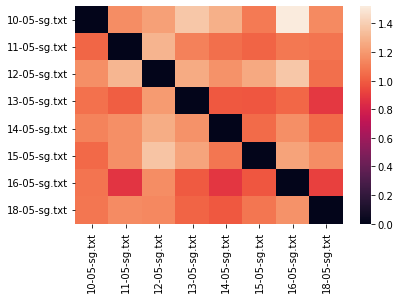

In [ ]:
L = []
for p in corpora:
    l = []
    for q in corpora:
        l.append(Divergence(p,q, difference = 'KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_mds.py:518: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  "The MDS API has changed. ``fit`` now constructs an"


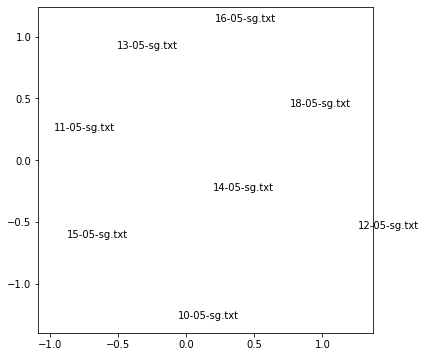

In [ ]:
mds = sklearn.manifold.MDS()
pos = mds.fit(M).embedding_
x = pos[:,0]
y = pos[:,1]
fig, ax = plt.subplots(figsize = (6,6))
plt.plot(x, y, ' ')
for i, txt in enumerate(fileids):
    ax.annotate(txt, (x[i],y[i]))

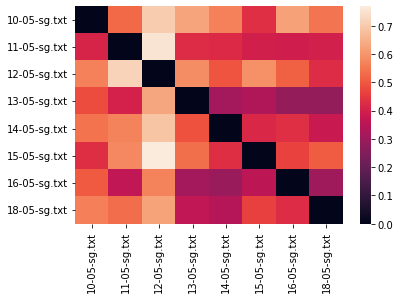

In [ ]:
L = []
for p in corpora_s:
    l = []
    for q in corpora_s:
        l.append(Divergence(p,q, difference='KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

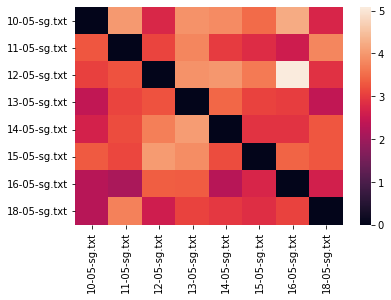

In [ ]:
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference='KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

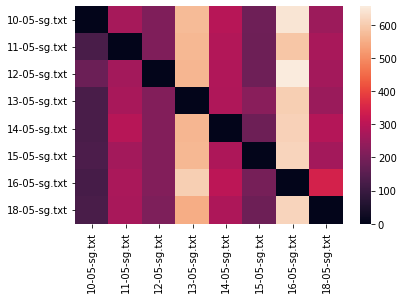

In [ ]:
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference='Chi2'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

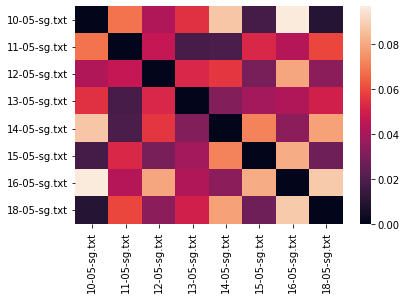

In [ ]:
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference='KS'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

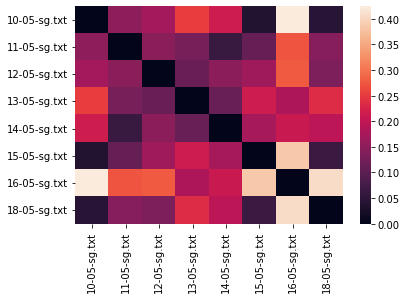

In [ ]:
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference='Wasserstein'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

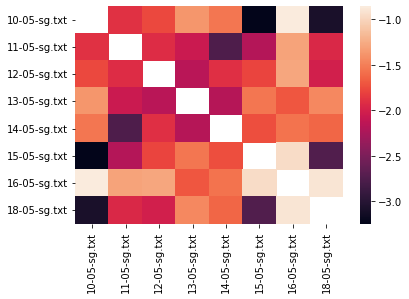

In [ ]:
ax = sns.heatmap(div.apply(np.log).replace([np.inf, -np.inf], np.nan))
plt.show()

Unsurprisingly, the differences in topics between the years are apparent. However, based on the heatmaps, there seems to be a consistent overlap between newspaper stories in the year 2010, 2013, and 2018. Based on this, it would be interesting to further investigate the political and social occurrences during these times. The KL score seems to be the most useful and I want to see how far apart articles across the years are; for future analysis, we could use this to see how language use has changed and how much the descriptions of similar events have changed. 